In [2]:
import numpy as np 

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister 
from qiskit_aer import AerSimulator, QasmSimulator, StatevectorSimulator
from qiskit.compiler import transpile
from qiskit.quantum_info import Operator, Pauli
from qiskit.quantum_info import process_fidelity 
from qiskit.circuit.library import RXGate, XGate, CXGate


Operator Class

The `Operator` class can represent matrix operators acting on quantum systems. It has several methods to build composite operators using tensor products of smaller operators, and to compose operators. 

Creating Operators

In [3]:
XX = Operator(
    [
        [0, 0, 0, 1], 
        [0, 0, 1, 0], 
        [0, 1, 0 ,0], 
        [1, 0, 0, 0]
    ]
)

XX.draw('latex')

<IPython.core.display.Latex object>

Operator Properties

- `data`: access the underlying numpy array
- `dims`: return the total input and output dimension 
- `Operator.dim`: (input_dim, output_dim), the reverse of the shape of the underlying matrix

In [4]:
XX.data

array([[0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]])

In [6]:
input_dim, output_dim = XX.dim
input_dim, output_dim

(4, 4)

Input and Output Dimensions 

The operator class keeps track of subsystem dimensions, which can be used for composing operators together. These can be accessed via `input_dims` and `output_dims` functions. 

In [11]:
op = Operator(np.random.rand(2**1, 2**2))

print('input dimensions:', op.input_dims())
print('output dimensions:', op.output_dims())

input dimensions: (2, 2)
output dimensions: (2,)


Converting classes to operators

- `Pauli` objects
- `Gate` and `Instruction` objects
- `QuantumCircuit` objects

In [16]:
pauliXX = Pauli('XX')
display(Operator(pauliXX))
display(Operator(CXGate()))
display(Operator(RXGate(np.pi / 2)))


Operator([[0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))
Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))
Operator([[0.70710678+0.j        , 0.        -0.70710678j],
          [0.        -0.70710678j, 0.70710678+0.j        ]],
         input_dims=(2,), output_dims=(2,))


In [18]:
circ = QuantumCircuit(10)
circ.h(0)

for j in range(1, 10): 
    circ.cx(j-1, j)

# entire circuit to operator
Operator(circ)

Operator([[ 0.70710678+0.j,  0.70710678+0.j,  0.        +0.j, ...,
            0.        +0.j,  0.        +0.j,  0.        +0.j],
          [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j, ...,
            0.        +0.j,  0.        +0.j,  0.        +0.j],
          [ 0.        +0.j,  0.        +0.j,  0.        +0.j, ...,
            0.        +0.j,  0.        +0.j,  0.        +0.j],
          ...,
          [ 0.        +0.j,  0.        +0.j,  0.        +0.j, ...,
            0.        +0.j,  0.        +0.j,  0.        +0.j],
          [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j, ...,
            0.        +0.j,  0.        +0.j,  0.        +0.j],
          [ 0.70710678+0.j, -0.70710678+0.j,  0.        +0.j, ...,
            0.        +0.j,  0.        +0.j,  0.        +0.j]],
         input_dims=(2, 2, 2, 2, 2, 2, 2, 2, 2, 2), output_dims=(2, 2, 2, 2, 2, 2, 2, 2, 2, 2))


Using Operators in Circuits 

Unitary Operators can be inserted into circuits via `QuantumCircuit.append`. If the operator is not unitary, an exception is raised. 

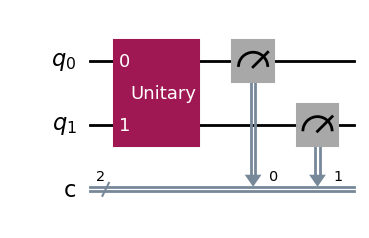

In [24]:
XX = Operator(Pauli('XX'))

circ = QuantumCircuit(2, 2)
circ.append(XX, [0, 1])
circ.measure([0, 1], [0, 1])
circ.draw('mpl')

In [26]:
backend = AerSimulator()
job = backend.run(transpile(circ, backend))
results = job.result().get_counts()
print(results)

{'11': 1024}


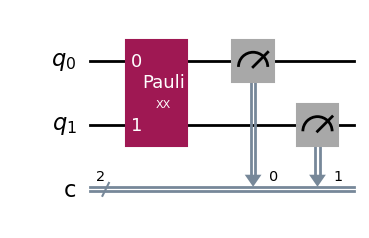

{'11': 1024}

In [30]:
circ2 = QuantumCircuit(2, 2)
circ2.append(Pauli('XX'), [0, 1])
circ2.measure([0, 1], [0, 1])
display(circ2.draw('mpl'))


job = backend.run(transpile(circ2, backend))
job.result().get_counts()

Combining Operators

Operators can be combined several different ways

Tensor Product `A.tensor(B)` $= A \otimes B$

In [31]:
A = Operator(Pauli('X'))
B = Operator(Pauli('Z'))
A.tensor(B)

Operator([[ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j],
          [ 0.+0.j, -0.+0.j,  0.+0.j, -1.+0.j],
          [ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
          [ 0.+0.j, -1.+0.j,  0.+0.j, -0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


In [32]:
display(Operator(Pauli('XZ')))

Operator([[ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j],
          [ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
          [ 0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


A closely related operation is `Operator.expand` which acts like a tensor product but in reverse order. `A.expand(B)` = $B\otimes A$

In [34]:
A = Operator(Pauli('X'))
B = Operator(Pauli('Z'))

A.expand(B)

Operator([[ 0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j],
          [ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
          [ 0.+0.j,  0.+0.j, -0.+0.j, -1.+0.j],
          [ 0.+0.j,  0.+0.j, -1.+0.j, -0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


Composition

We can also compose two operators to implement matrix multiplication. `A.compose(B)` = $BA$ 

In [35]:
A = Operator(Pauli('X'))
B = Operator(Pauli('Z'))

A.compose(B)

Operator([[ 0.+0.j,  1.+0.j],
          [-1.+0.j,  0.+0.j]],
         input_dims=(2,), output_dims=(2,))


In [40]:
A.compose(B, front = True) # AB reversed

Operator([[ 0.+0.j, -1.+0.j],
          [ 1.+0.j,  0.+0.j]],
         input_dims=(2,), output_dims=(2,))


Subsystem Composition

In [48]:
op = Operator(np.eye(2 ** 3))
XZ = Operator(Pauli('XZ'))
opXZ = op.compose(XZ, qargs = [0, 2])

In [49]:
YX = Operator(Pauli('YX'))
op.compose(YX, qargs = [0, 2], front = True)

Operator([[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.-1.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.-1.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.-1.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.-1.j, 0.+0.j],
          [0.+0.j, 0.+1.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+1.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+1.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+1.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2, 2), output_dims=(2, 2, 2))


Linear combinations

In [50]:
XX = Operator(Pauli('XX'))
YY = Operator(Pauli('YY'))
ZZ = Operator(Pauli('ZZ'))

op = 0.5 * (XX + YY - 3 * ZZ)
op

Operator([[-1.5+0.j,  0. +0.j,  0. +0.j,  0. +0.j],
          [ 0. +0.j,  1.5+0.j,  1. +0.j,  0. +0.j],
          [ 0. +0.j,  1. +0.j,  1.5+0.j,  0. +0.j],
          [ 0. +0.j,  0. +0.j,  0. +0.j, -1.5+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


In [51]:
op.is_unitary()

False

Comparison of Operators

Operators implement an equality method that can be used to check if two operators are approximately equal. 

In [52]:
Operator(Pauli('X')) == Operator(XGate())

True

Two unitaries that differ by a global phase will not be considered equal 

In [54]:
Operator(XGate()) == np.exp(1j * 0.5) * Operator(XGate())

False

We may also compare operator using the `process_fidelity` function. This is an information theoretic quantity for how close two quantum channels are to each other in matrix space. It does not depend on global phase

In [58]:
op_a = Operator(XGate())
op_b = np.exp(1j * 0.5) * Operator(XGate())

F = process_fidelity(op_a, op_b)
print('Fidelity: ', F)

Fidelity:  1.0
